# Parameter sweep of mutation effect size

This notebook explore how the effect size of new mutations steer the evolutionary process. Mutations are modeled as a Brownian motion of the model parameters: two microscopic association constants k1 and k2, and a cooperativity factor f. Effect size is scaled by changing the Brownian motion model parameter dt

The takeaway is that variance grows in the population as the dt parameter grows. For every log unit in dt, the population variance increases about 2 log units, and with similar temporal dynamics

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
%matplotlib inline

### dt = .01
### Binding model parameters: k1=1e7, k2=1e8, f=10

#### For each generation, the following stats are logged: mean and variance of population fitness; variance of model parameters; and number of unique parameters in population. Evolution was run on a population size of 1000 for 1000 generations

In [2]:
dt1 = pd.read_csv("../ParamSweeps/dt/dtSweep_0.1_0.csv",index_col=0)
dt1.head()

,w_bar,w_var,k1_var,k2_var,f_var,mean_k1,mean_k2,mean_f
gen,,,,,,,,
0,0.999742,2.338143e-07,0.015060,0.012476,0.010973,1.000000e+07,1.000000e+08,10.005781
1,0.999519,3.930315e-07,0.026342,0.023649,0.022829,1.000000e+07,1.000000e+08,10.013005
2,0.999358,4.952473e-07,0.041740,0.039258,0.033122,1.000000e+07,1.000000e+08,9.999520
3,0.999181,5.849554e-07,0.056227,0.055269,0.045969,1.000000e+07,1.000000e+08,10.000371
4,0.999018,7.722807e-07,0.066621,0.072313,0.063539,1.000000e+07,1.000000e+08,10.003291


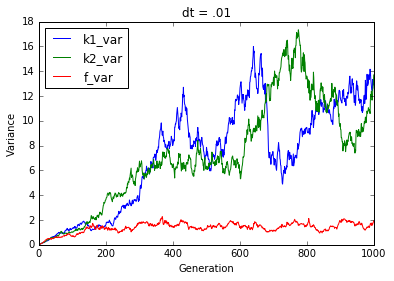

In [3]:
dt1[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = .01")

#### The k parameters steadily increase in variance

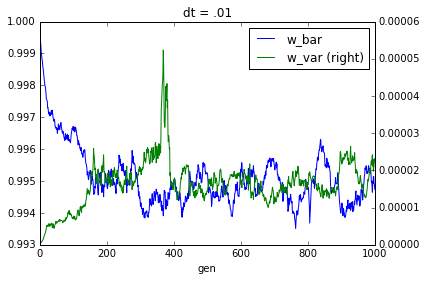

In [4]:
ax = dt1[["w_bar"]].plot()
dt1[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = .01")
plt.xlabel("Generations")

#### The population mean fitness stays very close to 1, and the fitness variance near 0. They seem roughly anticorrelated, which makes sense (mutational load)

### dt = 1000

In [5]:
dt2 = pd.read_csv("../ParamSweeps/dt/dtSweep_1000_0.csv",index_col=0)
dt2.head()

,w_bar,w_var,k1_var,k2_var,f_var,mean_k1,mean_k2,mean_f
gen,,,,,,,,
0,0.929366,0.016377,1.230710e+06,1.598725e+06,5.007681e+05,1.000003e+07,9.999998e+07,243.874249
1,0.882327,0.021791,2.795269e+06,3.029547e+06,9.403960e+05,1.000012e+07,1.000000e+08,424.971532
2,0.849667,0.022574,4.040945e+06,4.558383e+06,1.355830e+06,1.000008e+07,1.000001e+08,589.378732
3,0.828114,0.022475,5.182186e+06,5.454501e+06,1.500965e+06,1.000008e+07,1.000000e+08,666.523369
4,0.817908,0.021509,6.278367e+06,6.832406e+06,2.172256e+06,1.000002e+07,1.000001e+08,855.344695


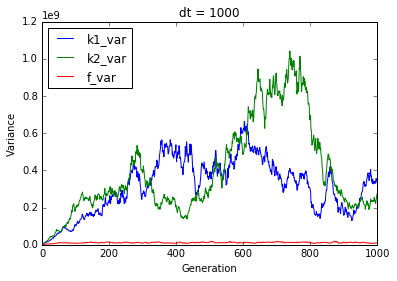

In [6]:
dt2[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = 1000")

#### Qualitatively similar dynamics to when dt = .01

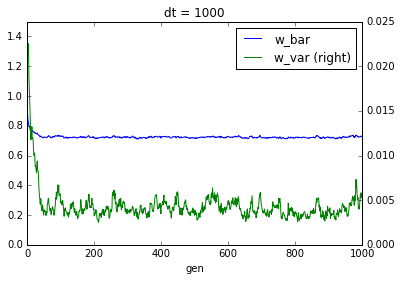

In [7]:
ax = dt2[["w_bar"]].plot(ylim=(0,1.5))
dt2[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = 1000")
plt.xlabel("Generations")

#### Fitness mean and variance also stay steady, though the mean fitness is quite a bit lower than when dt = .01 and variance a bit higher

### Now we'll plot all the variances for the different dts on one plot

Each dt value was run for 3 replicates

In [8]:
def plot_vars(infile_list,paramName,log=True):
    
    ax = plt.plot()

    styleD1 = {"0.1":"b--","1":"r--","10":"g--","100":"k--","1000":"m--"}
    styleD2 = {"0.1":"blue","1":"red","10":"green","100":"black","1000":"magenta"}

    for f in infile_list:
        df = pd.read_csv(f)
        df[paramName].plot(style=styleD1[f.split("_")[1]],label=paramName.split("_")[0])

    if log:
        plt.yscale("log")
    plt.ylabel("%s variance" % paramName.split("_")[0])
    plt.xlabel("Generation")
    
    legend_proxies = []
    dts = styleD2.keys()
    dts.sort(key=float)
    dts.reverse()
    
    for dt in dts:
        prox = mlines.Line2D([], [], color=styleD2[dt], label=dt, linewidth=3)
        legend_proxies.append(prox)

    plt.legend(handles=legend_proxies,bbox_to_anchor=(1.25,1),title="dt")

In [9]:
tmp = !ls ../ParamSweeps/dt/*.csv
files = list((tmp))

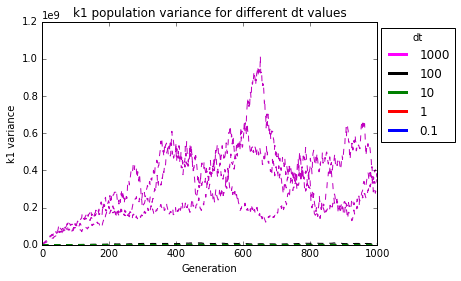

In [10]:
plot_vars(files,"k1_var",log=False)
plt.title("k1 population variance for different dt values")

#### They are on very different scales (we'll do a log y below)

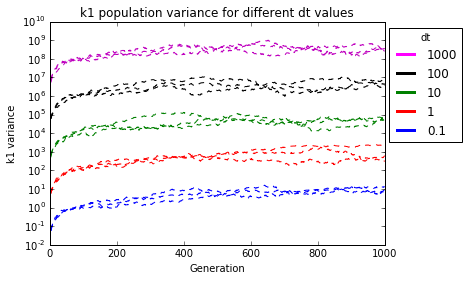

In [11]:
plot_vars(files,"k1_var",log=True)
plt.title("k1 population variance for different dt values")

#### This is cool. For every log unit change in the dt parameter, the variance growth in the popluation scales up 2 log units.

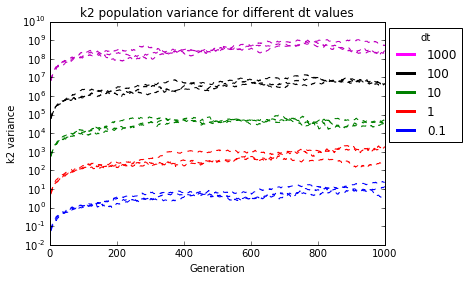

In [12]:
plot_vars(files,"k2_var",log=True)
plt.title("k2 population variance for different dt values")
plt.savefig("k2_variance.png")

#### The same is true for the k2 parameter. Both k1 and k2 variance seem to grow without bound.

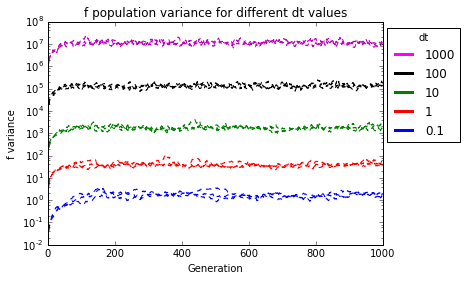

In [13]:
plot_vars(files,"f_var",log=True)
plt.title("f population variance for different dt values")
plt.savefig("f_variance.png")

#### The f parameter does seem to have bound, though with similar scaling.

### Now we'll take a look at the parameter means during the run

In [14]:
def plot_bars(infile_list,paramName,log=True):
    
    ax = plt.plot()

    styleD1 = {"0.1":"b--","1":"r--","10":"g--","100":"k--","1000":"m--"}
    styleD2 = {"0.1":"blue","1":"red","10":"green","100":"black","1000":"magenta"}

    for f in infile_list:
        df = pd.read_csv(f)
        df[paramName].plot(style=styleD1[f.split("_")[1]],label=paramName.split("_")[0])

    if log:
        plt.yscale("log")
    plt.ylabel("%s mean" % paramName.split("_")[1])
    plt.xlabel("Generation")
    
    legend_proxies = []
    dts = styleD2.keys()
    dts.sort(key=float)
    dts.reverse()
    
    for dt in dts:
        prox = mlines.Line2D([], [], color=styleD2[dt], label=dt, linewidth=3)
        legend_proxies.append(prox)

    plt.legend(handles=legend_proxies,bbox_to_anchor=(1.25,1),title="dt")

In [15]:
tmp = !ls ../ParamSweeps/dt/*.csv
files = list(tmp)
files.sort(key=lambda x: float(x.split("_")[1]))

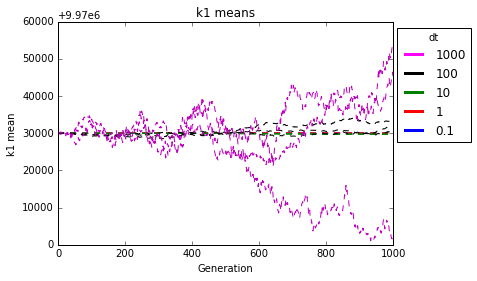

In [16]:
plot_bars(files,"mean_k1",log=False)
plt.title("k1 means")
plt.savefig("k1_means.png")

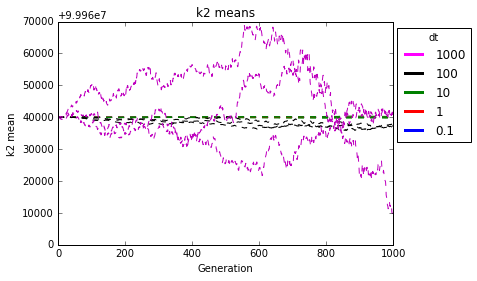

In [17]:
plot_bars(files,"mean_k2",log=False)
plt.title("k2 means")

#### The k parameters look like they basically diverge in simple Brownian motion

#### Let's look at the f params

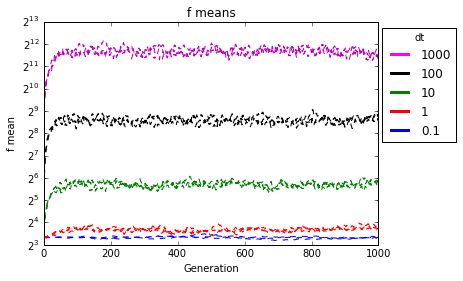

In [18]:
plot_bars(files,"mean_f",log=False)
plt.yscale("log",basey=2)
plt.title("f means")
plt.savefig("f_means.png")

#### Unlike the k params, f doesn't drift. It goes up to a fixed value, just like the variance. Let's take a closer look at the beginnings of the curves

In [19]:
fBarDF = pd.DataFrame()
for i in files:
    tmp = pd.read_csv(i,index_col=0)[["mean_f"]]
    tmp.columns = ["mean_f_" + "_".join(i.split("_")[1:3])]
    fBarDF = pd.concat([fBarDF,tmp],axis=1)
fBarDF.head()

,mean_f_0.1_0.csv,mean_f_0.1_1.csv,mean_f_0.1_2.csv,mean_f_1_0.csv,mean_f_1_1.csv,mean_f_1_2.csv,mean_f_10_0.csv,mean_f_10_1.csv,mean_f_10_2.csv,mean_f_100_0.csv,mean_f_100_1.csv,mean_f_100_2.csv,mean_f_1000_0.csv,mean_f_1000_1.csv,mean_f_1000_2.csv
gen,,,,,,,,,,,,,,,
0,10.005781,9.998371,9.999393,9.982661,9.994234,9.942558,11.397702,11.808206,12.597658,32.951285,32.175355,31.942731,243.874249,249.040587,178.603578
1,10.013005,10.000621,9.995273,10.062375,9.979869,9.980411,14.189098,12.954702,14.418776,53.168455,51.601617,51.849305,424.971532,456.643469,357.981444
2,9.999520,9.993986,9.996729,10.097292,10.053646,10.008497,15.302515,14.382643,16.513248,73.975192,62.999801,66.331771,589.378732,621.383738,489.369862
3,10.000371,9.999447,10.005138,10.089104,10.107575,10.013759,17.563705,15.897602,18.018579,92.928516,76.175089,89.599402,666.523369,636.592320,709.227741
4,10.003291,9.994436,10.021791,10.186860,10.118640,10.072957,18.487104,17.966388,19.625834,109.078306,102.283405,103.396042,855.344695,806.121349,836.238335


#### Let's normalize so we can look at them all on the same scale

In [20]:
oneEach = fBarDF.loc[:,fBarDF.columns[::3]]
oneEach.head()

,mean_f_0.1_0.csv,mean_f_1_0.csv,mean_f_10_0.csv,mean_f_100_0.csv,mean_f_1000_0.csv
gen,,,,,
0,10.005781,9.982661,11.397702,32.951285,243.874249
1,10.013005,10.062375,14.189098,53.168455,424.971532
2,9.999520,10.097292,15.302515,73.975192,589.378732
3,10.000371,10.089104,17.563705,92.928516,666.523369
4,10.003291,10.186860,18.487104,109.078306,855.344695


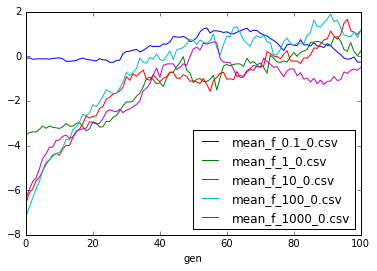

In [21]:
fBarNorm = (oneEach - oneEach.mean())/oneEach.std()
fBarNorm.ix[:100].plot(legend=False)
plt.legend(loc="best")
plt.savefig("norm-f_firstGens.png")

#### The parameters increase more or less monotonically towards a characteristic value for each dt. Presumably this has to do with robustness. 

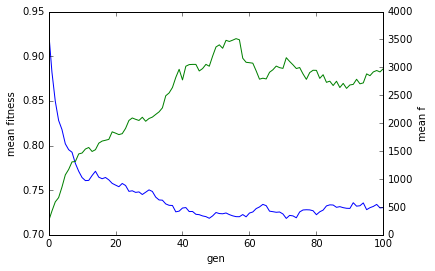

In [22]:
ax = dt2.ix[:100,"w_bar"].plot()
plt.ylabel("mean fitness")
dt2.ix[:100,"mean_f"].plot(ax=ax,secondary_y=True)
plt.ylabel("mean f")

In [23]:
df1 = pd.read_csv("../ParamSweeps/dt/dtSweep_0.1_0.csv",index_col=0)
df2 = pd.read_csv("../ParamSweeps/dt/dtSweep_1_0.csv",index_col=0)
df3 = pd.read_csv("../ParamSweeps/dt/dtSweep_10_0.csv",index_col=0)
df4 = pd.read_csv("../ParamSweeps/dt/dtSweep_100_0.csv",index_col=0)
df5 = pd.read_csv("../ParamSweeps/dt/dtSweep_1000_0.csv",index_col=0)

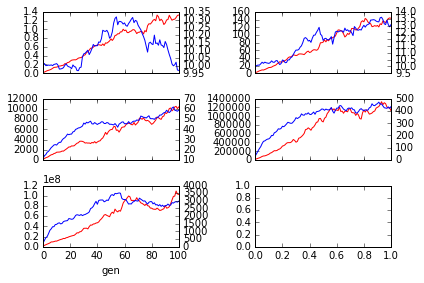

In [24]:
fig,axes = plt.subplots(3,2)

df1.ix[:100,"k1_var"].plot(ax=axes.flat[0],color='r')
df1.ix[:100,"mean_f"].plot(ax=axes.flat[0],secondary_y=True)

df2.ix[:100,"k1_var"].plot(ax=axes.flat[1],color='r')
df2.ix[:100,"mean_f"].plot(ax=axes.flat[1],secondary_y=True)

df3.ix[:100,"k1_var"].plot(ax=axes.flat[2],color='r')
df3.ix[:100,"mean_f"].plot(ax=axes.flat[2],secondary_y=True)

df4.ix[:100,"k1_var"].plot(ax=axes.flat[3],color='r')
df4.ix[:100,"mean_f"].plot(ax=axes.flat[3],secondary_y=True)

df5.ix[:100,"k1_var"].plot(ax=axes.flat[4],color='r')
df5.ix[:100,"mean_f"].plot(ax=axes.flat[4],secondary_y=True)

plt.tight_layout()

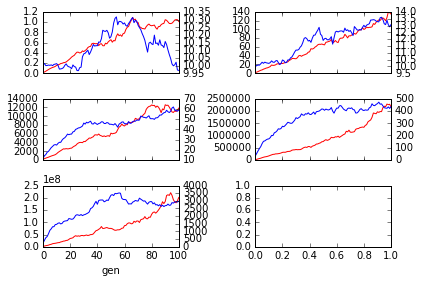

In [25]:
fig,axes = plt.subplots(3,2)

df1.ix[:100,"k2_var"].plot(ax=axes.flat[0],color='r')
df1.ix[:100,"mean_f"].plot(ax=axes.flat[0],secondary_y=True)

df2.ix[:100,"k2_var"].plot(ax=axes.flat[1],color='r')
df2.ix[:100,"mean_f"].plot(ax=axes.flat[1],secondary_y=True)

df3.ix[:100,"k2_var"].plot(ax=axes.flat[2],color='r')
df3.ix[:100,"mean_f"].plot(ax=axes.flat[2],secondary_y=True)

df4.ix[:100,"k2_var"].plot(ax=axes.flat[3],color='r')
df4.ix[:100,"mean_f"].plot(ax=axes.flat[3],secondary_y=True)

df5.ix[:100,"k2_var"].plot(ax=axes.flat[4],color='r')
df5.ix[:100,"mean_f"].plot(ax=axes.flat[4],secondary_y=True)

plt.tight_layout()